# Win Prediction
               - Imarticus DSP_Online_02 Group K

In [1]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data
df = pd.read_excel('Win_Prediction_Data.xlsx')
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [3]:
# Preliminary Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


There are few null values in the Client Category column.

Deal Date column is already in datetime format.  
Hence, not needed to convert it again.

In [4]:
df.describe().round(2)

,Deal Cost
count,10061.00
mean,766896.87
std,1619893.80
min,0.00
25%,189705.88
50%,382352.94
75%,764705.88
max,36764705.88


Only one numerical column.

## Step 1: Data Cleaning
We need to impute the null values in the Client Category column.

In [5]:
df['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

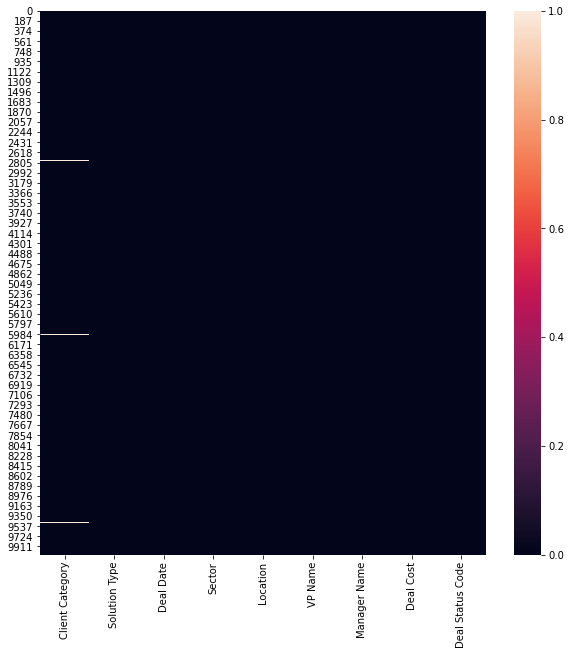

In [6]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isna());

In [7]:
df[df['Client Category'].isna()]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
488,NaN,Solution 7,2018-10-05,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
491,NaN,Solution 7,2019-01-06,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
518,NaN,Solution 10,2012-01-12,Sector 19,L10,Mangesh K. Singh,Hardeep Suksma,38235.29,Won
732,NaN,Solution 10,2013-11-08,Sector 23,L10,Rosanna Maynez,Sohil Kumar,58823.53,Won
1128,NaN,Solution 37,2013-09-27,Sector 24,L10,Mervin Harwood,Marcelo Riles,311764.71,Lost
...,...,...,...,...,...,...,...,...,...
9477,NaN,Solution 32,2018-09-26,Sector 23,L10,Long Bergstrom,Md Irshad,588235.29,Lost
9753,NaN,Solution 9,2018-08-04,Sector 19,L10,Gopa Trilochana,Darla Dickinson,485294.12,Won
9819,NaN,Solution 9,2018-09-15,Sector 19,L10,Clinton Mani,Sanchita Gulati,720588.24,Won
9904,NaN,Solution 14,2018-11-29,Sector 12,L10,Mangesh K. Singh,keshar ansari,529411.77,Won


In [8]:
for col in df.select_dtypes(include = 'object'):    
    print(df[df['Client Category'].isna()][col].value_counts(), '\n')

Series([], Name: Client Category, dtype: int64) 

Solution 32    12
Solution 37    12
Solution 67    10
Solution 29     9
Solution 10     7
Solution 9      7
Solution 12     5
Solution 6      4
Solution 4      2
Solution 7      2
Solution 8      2
Solution 31     2
Solution 39     1
Solution 38     1
Solution 42     1
Solution 28     1
Solution 14     1
Name: Solution Type, dtype: int64 

Sector 24    28
Sector 19    15
Sector 12    10
Sector 23     8
Sector 6      6
Sector 3      4
Sector 15     4
Sector 20     2
Sector 5      2
Name: Sector, dtype: int64 

L10    79
Name: Location, dtype: int64 

Ankita Aggarwal     13
Mangesh K. Singh    13
Long Bergstrom      12
Mervin Harwood      10
Russell Dahlen       6
Son Mcconnaughy      6
Rahul Bajpai         6
Gopa Trilochana      3
neeraj kumar         2
Sargar Deep Rao      2
Prashant Rawat       2
Jewell Tunstall      1
Rosanna Maynez       1
Clinton Mani         1
som dutt             1
Name: VP Name, dtype: int64 

Vaibhav singh      

Through this we notice that Location for all the null values is L10.

Let's look at the Location L10 category deeper.

In [9]:
df[df['Location']=='L10']

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
10,International Bank,Solution 6,2012-02-11,Sector 2,L10,Long Bergstrom,Luv Malhotra,316176.47,Won
16,Domestic Public Bank,Solution 59,2011-10-29,Sector 2,L10,Mervin Harwood,Prateek Dhotre,2764705.88,Won
17,Consumer Good,Solution 37,2012-03-04,Sector 12,L10,Lilli Storrs,Md. Daud,147058.82,Won
...,...,...,...,...,...,...,...,...,...
10047,Internal,Solution 32,2019-03-20,Sector 23,L10,Jitendra Choudhary,ramdin verma,55000.00,Won
10049,Finance,Solution 37,2019-03-31,Sector 17,L10,Clinton Mani,Sangeet Daga,470588.24,Won
10052,Telecom,Solution 9,2019-05-07,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,Lost
10055,Telecom,Solution 9,2019-05-23,Sector 24,L10,Gopa Trilochana,Darla Dickinson,823529.41,Lost


In [10]:
df[df['Location']=='L10']['Client Category'].value_counts()

Others                   492
Services_based           344
Domestic Public Bank     327
International Bank       243
Internal                 223
Tech                     196
Finance                  196
Domestic Private Bank    157
Insurance                116
Telecom                   96
Power ind                 74
Infrastructure            71
Domestic Bank             65
Retail_market             59
Pharma                    56
Consumer Good             52
Govt                      50
Media_Journal             48
Automobiles               43
Management                43
Consulting                42
Govt Bank Special         41
Healthcare                33
Manufacturing             30
Payment                   28
Hospitality               27
Industries                27
Share_market              14
Holding                   14
Logistics                 11
Electronics               11
Airpline                  10
Knowledge                  9
Energy                     9
International 

This direction didn't give us much results.

Let's instead look at Deal Cost.  
Perhaps the cost of the deal tells us about the type of client.

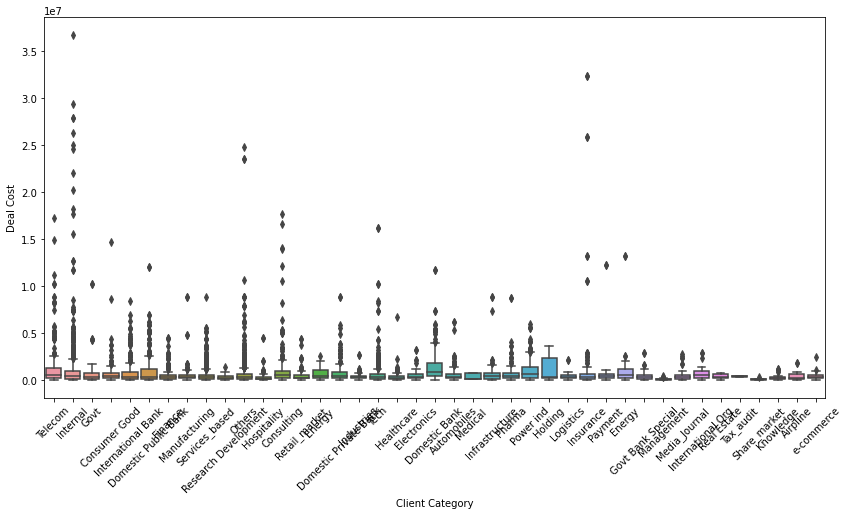

In [11]:
plt.figure(figsize = (14,7))
sns.boxplot(data = df, y = 'Deal Cost', x = 'Client Category')
plt.xticks(rotation = 45);

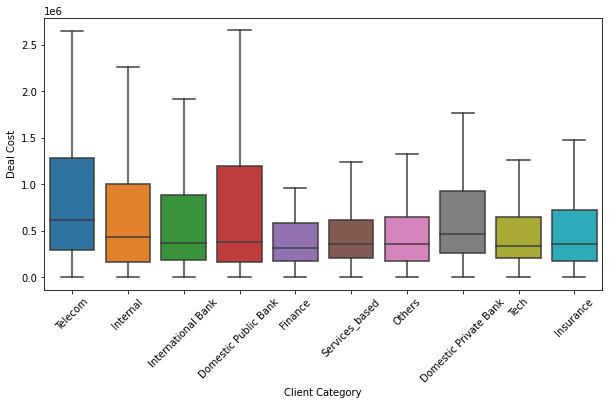

In [12]:
# As the above graph is not comprehensible, lets make another without outliers and only the major ones. 
plt.figure(figsize = (10,5))
df_cc = df[df['Client Category'].isin(['Others',
                                       'Services_based',
                                       'Domestic Public Bank',
                                       'International Bank',
                                       'Internal',
                                       'Finance',
                                       'Tech',
                                       'Domestic Private Bank',
                                       'Insurance',
                                       'Telecom'])]
sns.boxplot(data = df_cc, y = 'Deal Cost', x = 'Client Category', showfliers=False)
plt.xticks(rotation = 45);

Still there isn't much information we can take from this.  
In light of this information, we can choose to drop those rows altogether.

In [13]:
df.isna().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [27]:
print("The proportion of null values to the total data is {:.3f}%".format(79/len(df)))

The proportion of null values to the total data is 0.008%


Considering this, we will drop the null rows.

In [29]:
df = df.dropna()
df.shape

(9982, 9)